In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

file_path = '../../data/raw/fossil_fuel_co2_emissions-by-nation_with_continent.csv'
df = pd.read_csv(file_path)
df.head()

,Year,Country,Continent,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,Europe,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,Europe,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,Europe,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,Europe,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,Europe,2555,2555,0,0,0,0,0.0,0


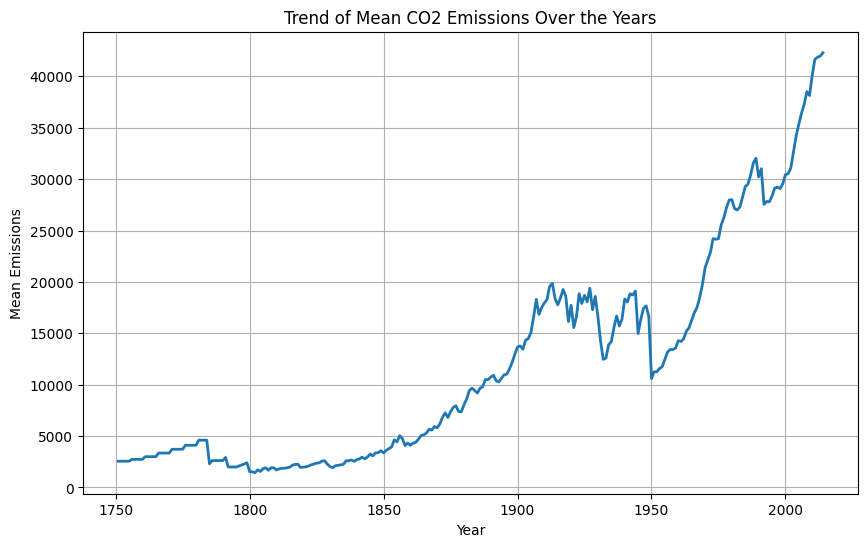

In [40]:
# Grouping the data by year and calculating the mean emissions per year
mean_emissions_per_year = df.groupby('Year')['Total'].mean()

# Plotting the line chart to show the trend of mean emissions over the years
plt.figure(figsize=(10, 6))
plt.plot(mean_emissions_per_year.index, mean_emissions_per_year.values, linewidth=2)
plt.xlabel('Year')
plt.ylabel('Mean Emissions')
plt.title('Trend of Mean CO2 Emissions Over the Years')
plt.grid(True)
plt.show()


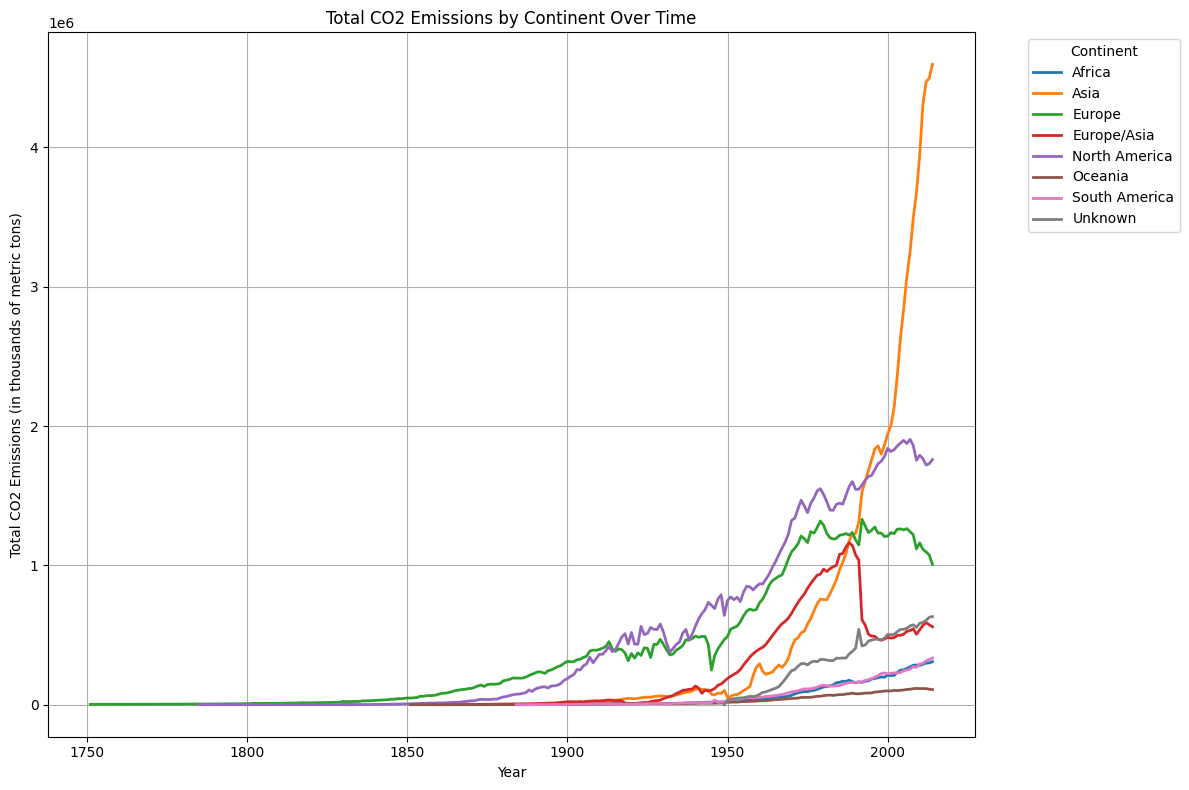

In [41]:
# Plotting total CO2 emissions by continent over time
plt.figure(figsize=(12, 8))
data_grouped_by_continent_year = df.groupby(['Year', 'Continent'])['Total'].sum().unstack()
data_grouped_by_continent_year.plot(ax=plt.gca(), linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (in thousands of metric tons)')
plt.title('Total CO2 Emissions by Continent Over Time')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


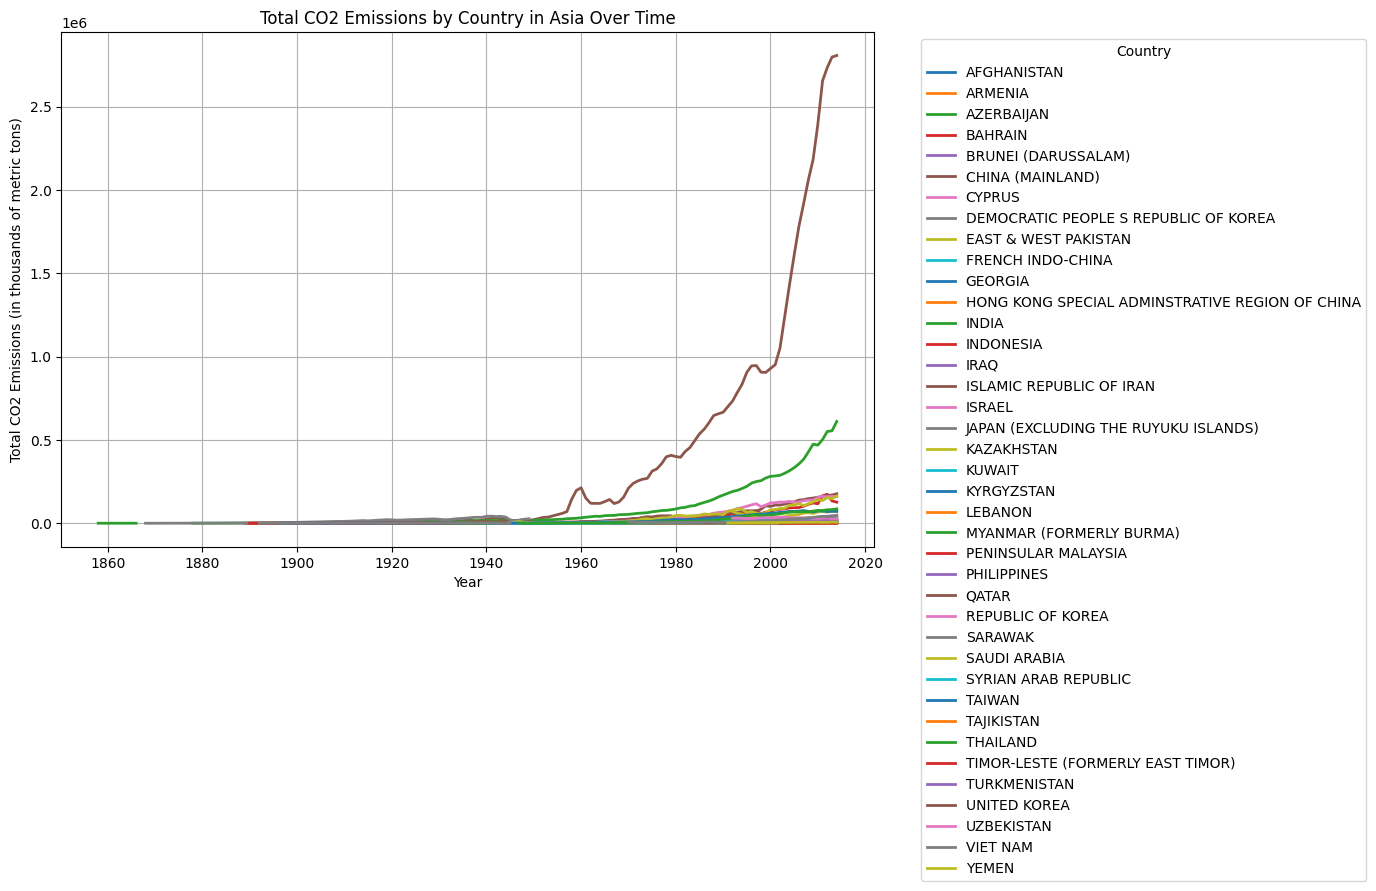

In [42]:
def plot_total_emissions_by_country_in_continent(df, continent_name):
    # Filter data for the specified continent
    continent_data = df[df['Continent'] == continent_name]
    
    # Group data by year and country and sum up the emissions
    emissions_by_country = continent_data.groupby(['Year', 'Country'])['Total'].sum().unstack()
    
    # Plot the data
    plt.figure(figsize=(14, 8))
    emissions_by_country.plot(ax=plt.gca(), linewidth=2)
    plt.xlabel('Year')
    plt.ylabel('Total CO2 Emissions (in thousands of metric tons)')
    plt.title(f'Total CO2 Emissions by Country in {continent_name} Over Time')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: Plot for Europe
plot_total_emissions_by_country_in_continent(df, "Asia")


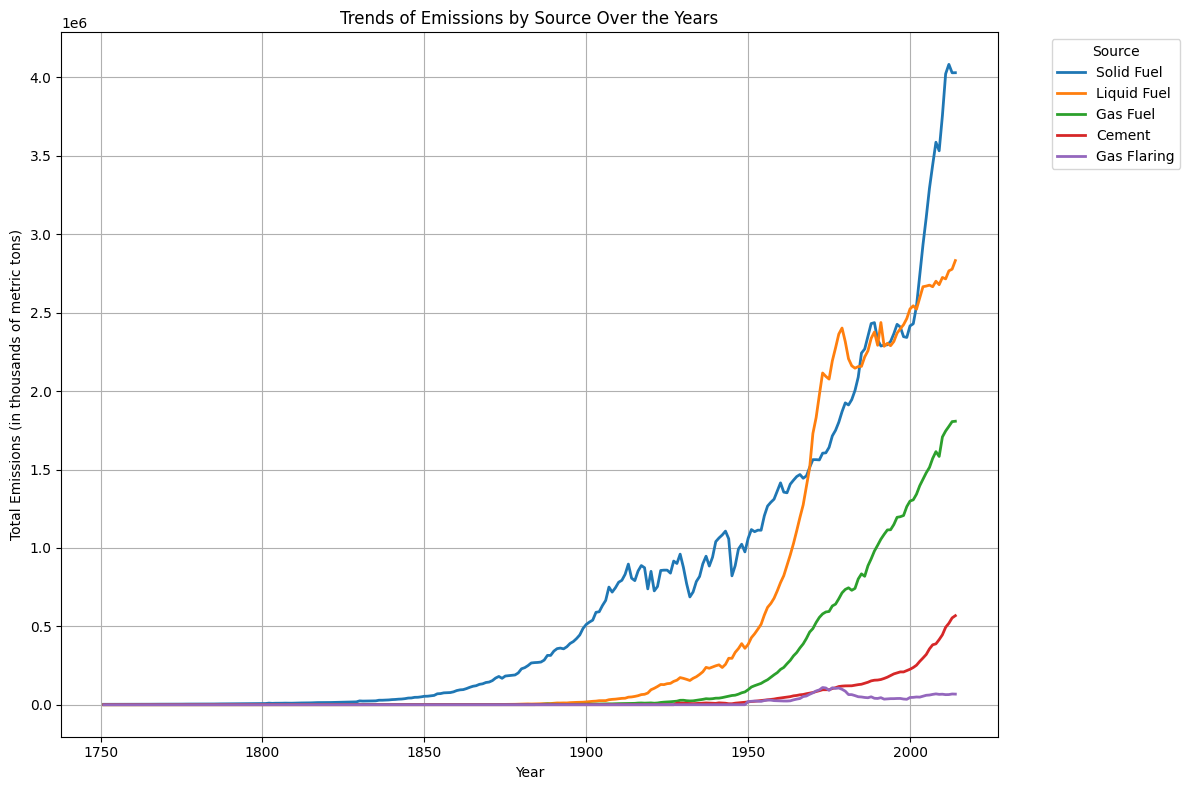

In [43]:
# Aggregating emissions by year for each source
emissions_by_year = df.groupby('Year')[['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring']].sum()

# Plotting trends of emissions by source over the years
plt.figure(figsize=(12, 8))
emissions_by_year.plot(ax=plt.gca(), linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total Emissions (in thousands of metric tons)')
plt.title('Trends of Emissions by Source Over the Years')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


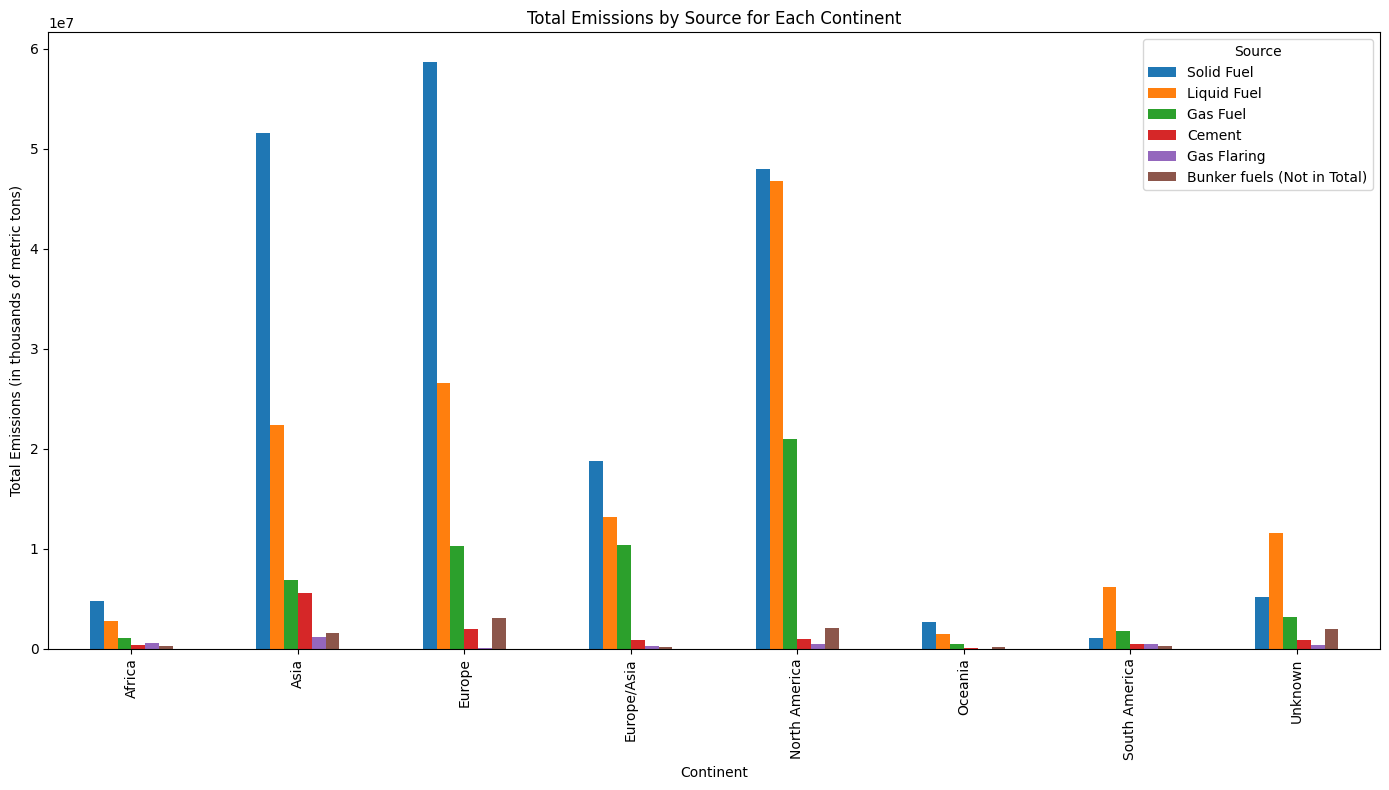

In [44]:
# Aggregating emissions by continent for each source
emissions_by_continent = df.groupby('Continent')[['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring', 'Bunker fuels (Not in Total)']].sum()

# Plotting total emissions by source for each continent
emissions_by_continent.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Continent')
plt.ylabel('Total Emissions (in thousands of metric tons)')
plt.title('Total Emissions by Source for Each Continent')
plt.legend(title='Source')
plt.tight_layout()
plt.show()


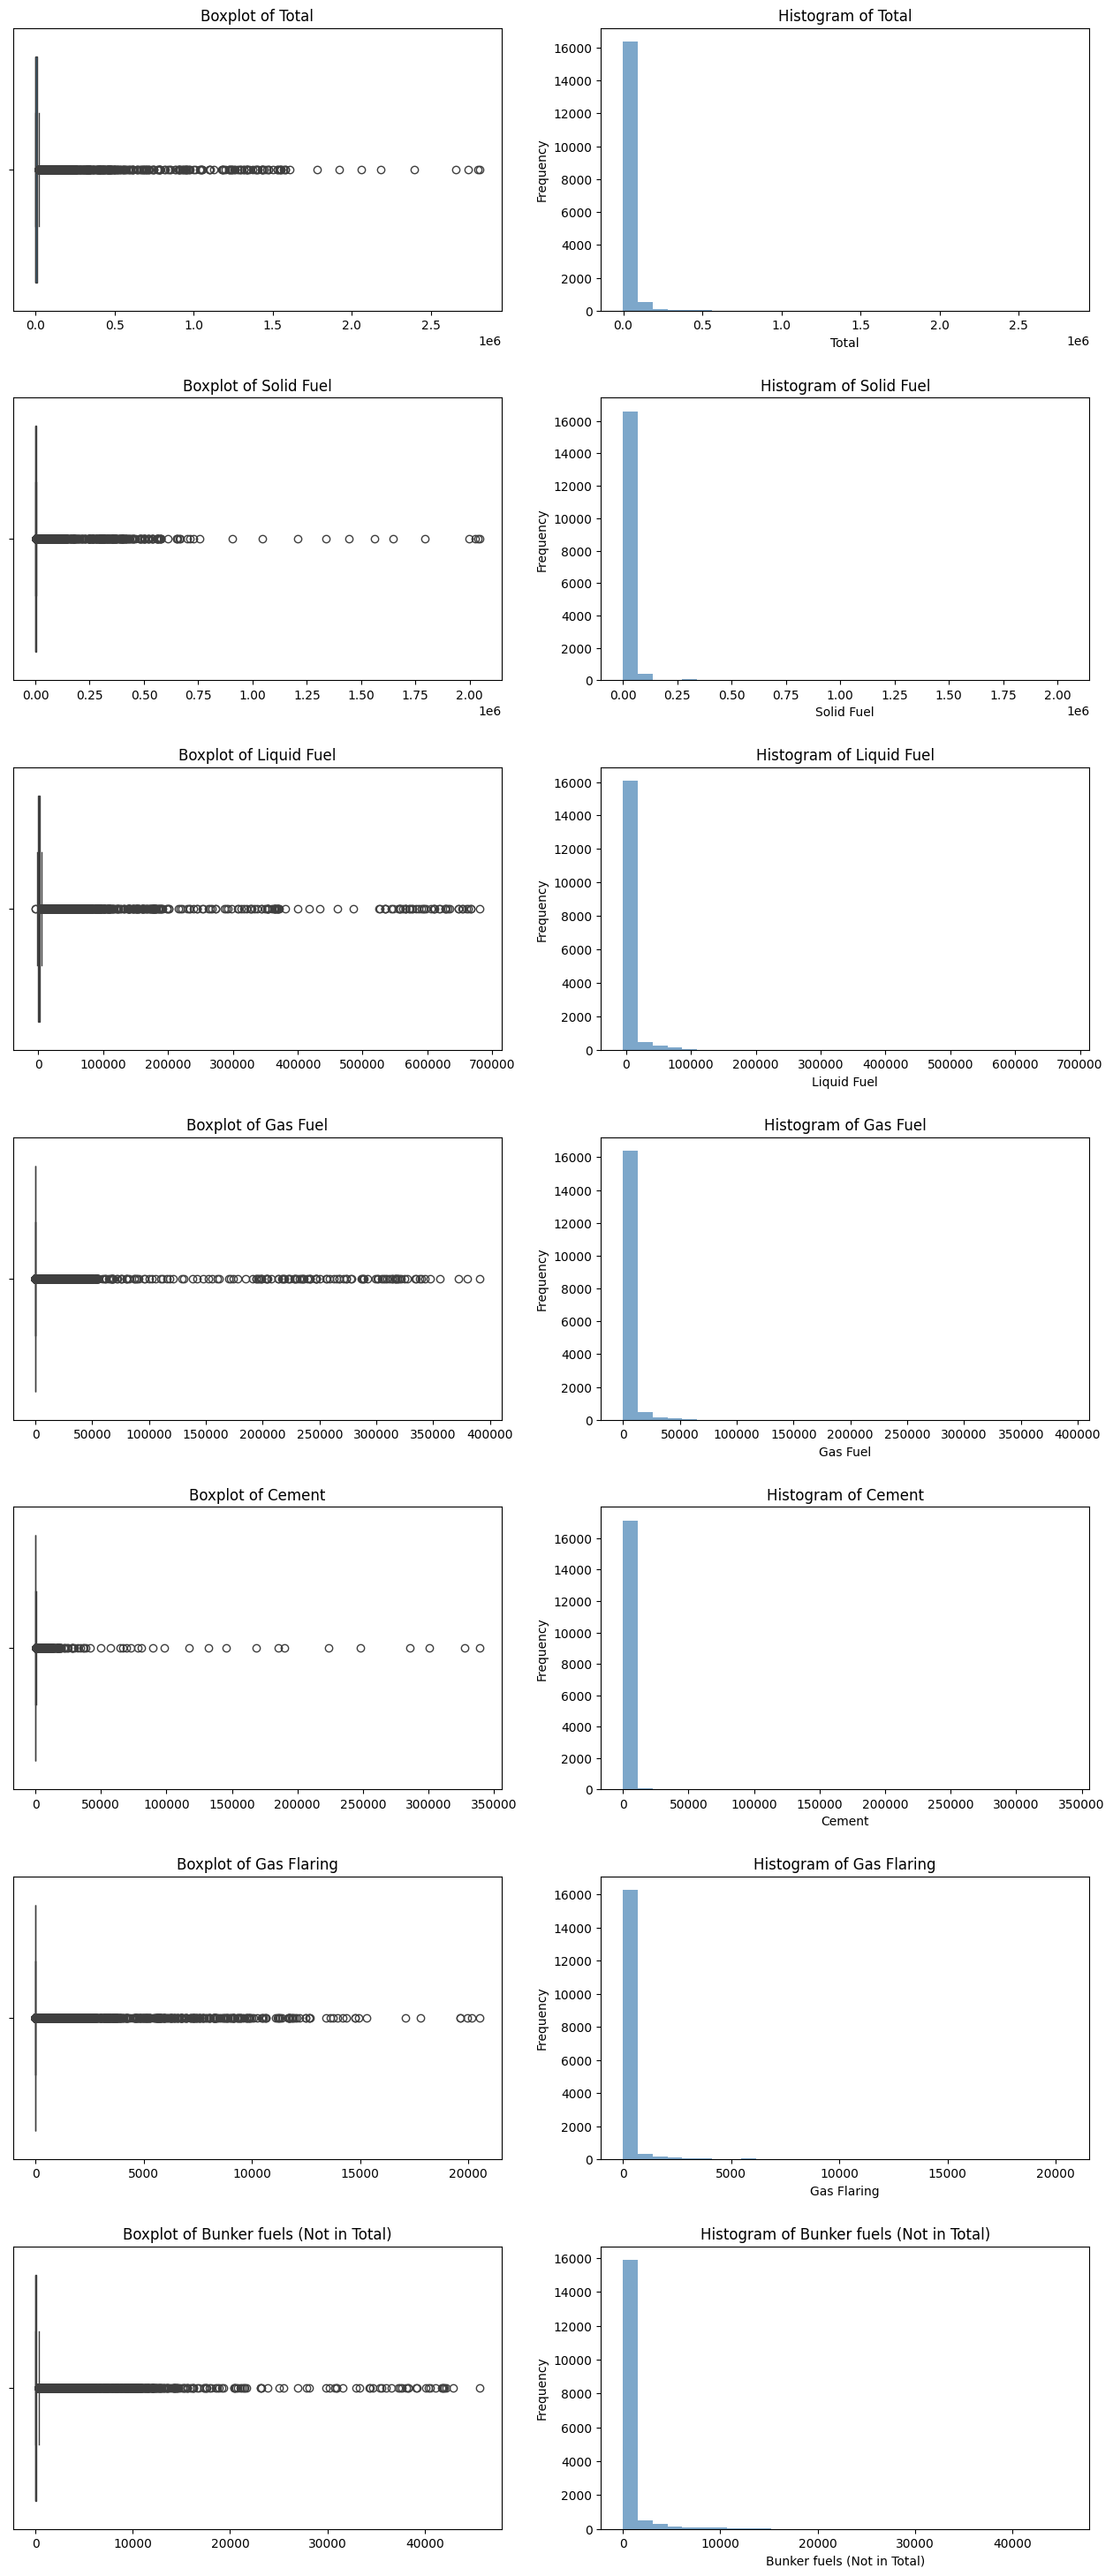

In [45]:
# Creating a subplot with boxplots and histograms for specified columns
emission_columns = ['Total', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring', 'Bunker fuels (Not in Total)']

# Setting up the figure
fig, axes = plt.subplots(len(emission_columns), 2, figsize=(14, 30))
fig.tight_layout(pad=5.0)

for i, column in enumerate(emission_columns):
    # Boxplot
    sns.boxplot(data=df, x=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i, 0].set_xlabel('')
    
    # Histogram
    axes[i, 1].hist(df[column], bins=30, alpha=0.7, color='steelblue')
    axes[i, 1].set_title(f'Histogram of {column}', fontsize=12)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

# Show the plot
plt.show()

In [46]:
# Calculate basic descriptive statistics for relevant columns
descriptive_stats = df.describe()

print(descriptive_stats)


               Year         Total    Solid Fuel    Liquid Fuel       Gas Fuel  \
count  17232.000000  1.723200e+04  1.723200e+04   17232.000000   17232.000000   
mean    1961.579561  2.268712e+04  1.107010e+04    7589.085829    3189.767700   
std       44.251691  1.132419e+05  6.206518e+04   39057.928585   20714.456024   
min     1751.000000 -1.473000e+03 -1.030000e+02   -4663.000000     -40.000000   
25%     1944.000000  1.170000e+02  0.000000e+00      21.000000       0.000000   
50%     1972.000000  9.645000e+02  5.400000e+01     263.000000       0.000000   
75%     1995.000000  8.059250e+03  2.002500e+03    2165.750000      71.000000   
max     2014.000000  2.806634e+06  2.045156e+06  680284.000000  390719.000000   

              Cement   Gas Flaring    Per Capita  Bunker fuels (Not in Total)  
count   17232.000000  17232.000000  17232.000000                 17232.000000  
mean      638.453865    199.718489      0.907776                   560.330606  
std      6631.010202   1087.88

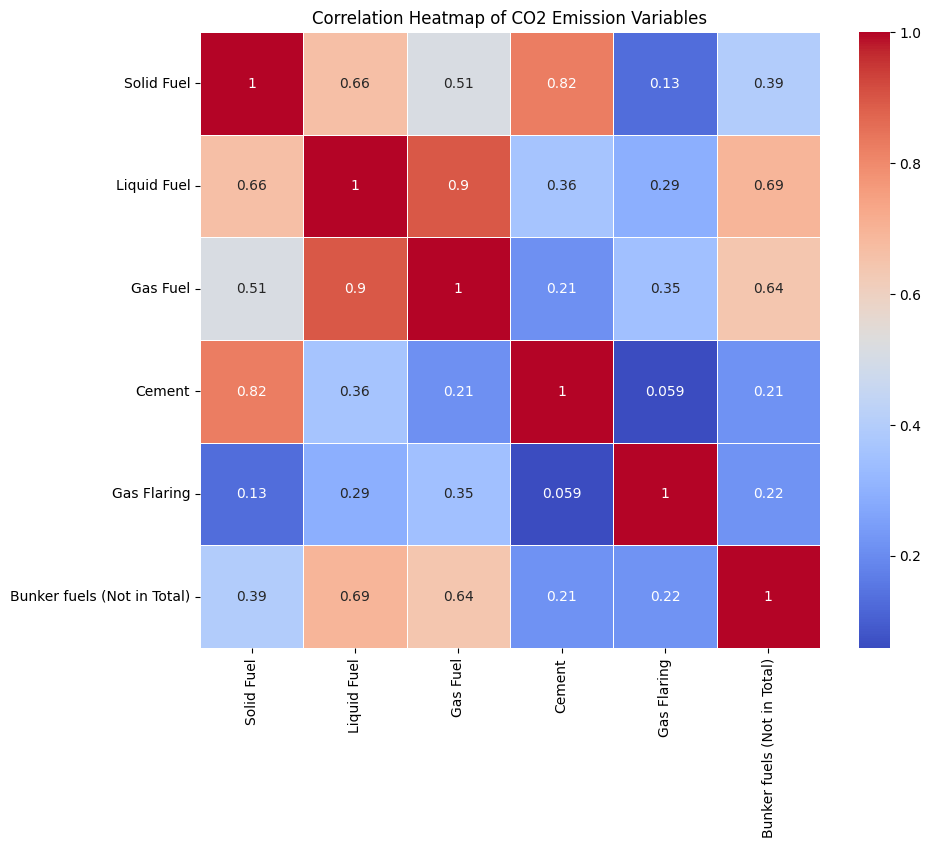

In [47]:
# Calculate the correlation matrix
correlation_matrix = df[['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring', 'Bunker fuels (Not in Total)']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of CO2 Emission Variables')
plt.show()


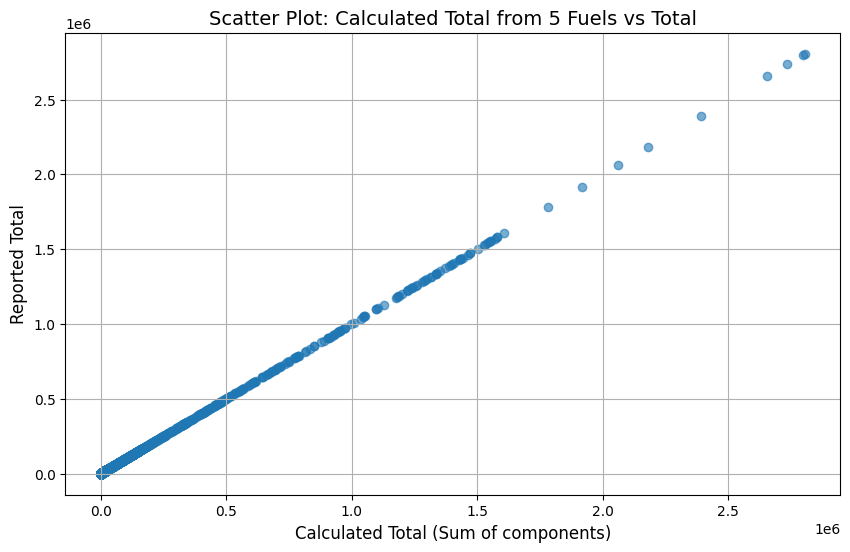

(0.9999999999925807,
 count    17232.000000
 mean        -0.007312
 std          0.436235
 min         -2.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          2.000000
 Name: Difference, dtype: float64)

In [48]:
# Calculate the sum of Solid Fuel, Liquid Fuel, Gas Fuel, Cement, and Gas Flaring
df['Calculated Total'] = (df['Solid Fuel'] + df['Liquid Fuel'] + 
                               df['Gas Fuel'] + df['Cement'] + 
                               df['Gas Flaring'])

# Calculate the difference between Total and Calculated Total
df['Difference'] = df['Total'] - df['Calculated Total']

# Check the correlation between Total and Calculated Total
correlation = df['Total'].corr(df['Calculated Total'])

# Scatter plot for visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Calculated Total'], df['Total'], alpha=0.6)
plt.title('Scatter Plot: Calculated Total from 5 Fuels vs Total', fontsize=14)
plt.xlabel('Calculated Total (Sum of components)', fontsize=12)
plt.ylabel('Reported Total', fontsize=12)
plt.grid(True)
plt.show()

# Display statistical summary for the difference
difference_stats = df['Difference'].describe()

correlation, difference_stats
